In [159]:
%matplotlib inline

In [160]:
import basf2
import pickle
import pandas
import numpy
import matplotlib.pyplot as plt

In [161]:
def pur_eff(select, target):
    n_p = numpy.count_nonzero(select)
    n_t = numpy.count_nonzero(target)
    n_tp = numpy.count_nonzero(target & select)
    pur = n_tp / n_p
    eff = n_tp / n_t
    bkg_rej = numpy.count_nonzero(~target & ~select) / numpy.count_nonzero(~target)
    rej = 1 - numpy.count_nonzero(select) / len(select)
    return dict(pur=pur, eff=eff, bkg_rej=bkg_rej, rej=rej)

In [162]:
data = pickle.load(open("riemann-mc-no-re-low_gun_const_b_10000.root.pickle", "rb"))
df = pandas.DataFrame.from_dict(data)
len(df)

727783

0.94172143325098279

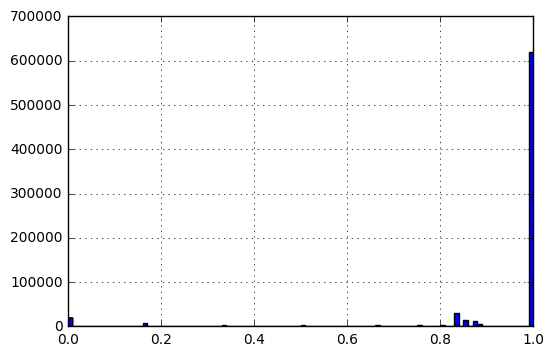

In [163]:
df.rl_purity.hist(bins=100)
df.rl_purity.mean()

(0.042687174611113481, 31067)

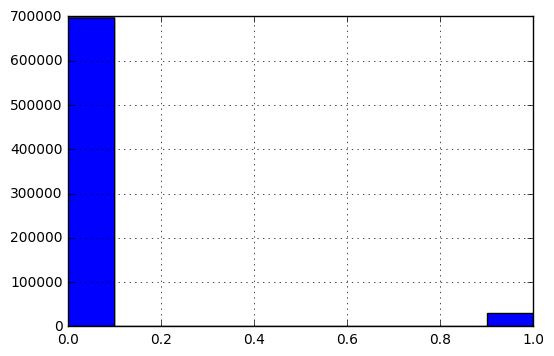

In [164]:
target = df.rl_purity < 0.5
target.hist()
target.mean(), numpy.count_nonzero(target)

In [167]:
target2 = (df.n_incorrect == 1) & (  (df.first_incorrect_location == 0) |  (df.last_incorrect_location == 1))
target2.mean(), numpy.sum(target2)

(0.054965559789112967, 40003)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x23b9b2b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x23c33a98>], dtype=object)

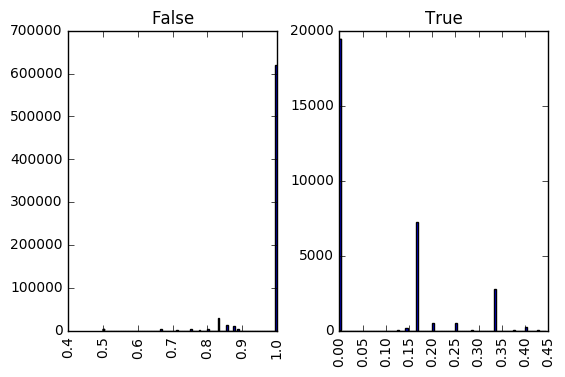

In [166]:
df.rl_purity.hist(bins=100, by=target)

In [148]:
switched = (df.alias_score != df.alias_score)
wrongly_switched = switched & target
switched.mean(), wrongly_switched.mean()

(0.059324001797239012, 0.017936665187287971)

(13054, -0.011777849622784433)

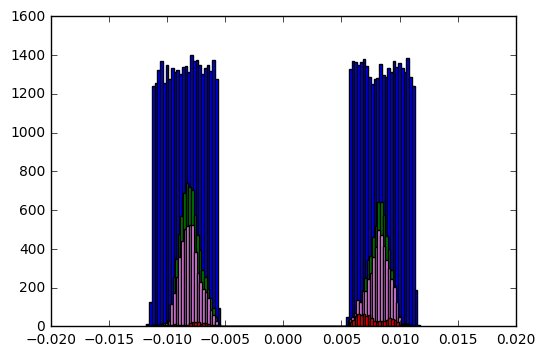

In [149]:
curvature_truth = df.curvature_truth[(df.superlayer_id==8) & (df.tan_lambda_truth.abs() > 0)]
plt.hist(curvature_truth, bins=100,)
plt.hist(curvature_truth[(target & ~switched) | (~target & switched)], bins=100, facecolor="g")
plt.hist(curvature_truth[switched], bins=100, facecolor="violet")
plt.hist(curvature_truth[wrongly_switched], bins=100, facecolor="r")

plt.xlim(-0.02, 0.02)
wrongly_switched.sum(), curvature_truth.min()

In [129]:
df["unstable_site"] = df.n_rl_switch < 3
df.unstable_site.sum(), len(df)

(16202, 72725)

In [130]:
pur_eff(df.unstable_site, target) # Very good agreement - search for something in the remaining segments

{'bkg_rej': 0.8291824420255561,
 'eff': 0.910550009786651,
 'pur': 0.2871250462905814,
 'rej': 0.7772155379855621}

In [131]:
df.may_alias.sum(), len(df)

(12205.0, 72725)

In [29]:
pur_eff(df.alias_score >= -1,  target)

{'bkg_rej': 0.8385677561513037,
 'eff': 0.9253715476367657,
 'pur': 0.2836890065051037,
 'rej': 0.7891981538453083}

In [32]:
pur_eff(df.alias_score>=-2, target)

{'bkg_rej': 0.6468497980168931,
 'eff': 0.9446771415814428,
 'pur': 0.15598691185867053,
 'rej': 0.6086223503434403}

In [33]:
pur_eff((df.n_rl_switch<3) | (df.alias_score >= -2), target)

{'bkg_rej': 0.6311759089239809,
 'eff': 0.9909000063785002,
 'pur': 0.1565596844955355,
 'rej': 0.5909742327039791}

In [34]:
target.groupby(df.may_alias).mean()

may_alias
0.0    0.006957
1.0    0.346123
Name: rl_purity, dtype: float64

In [35]:
df.may_alias[target].value_counts(sort=True).sort_index()

0.0     4202
1.0    42831
Name: may_alias, dtype: int64

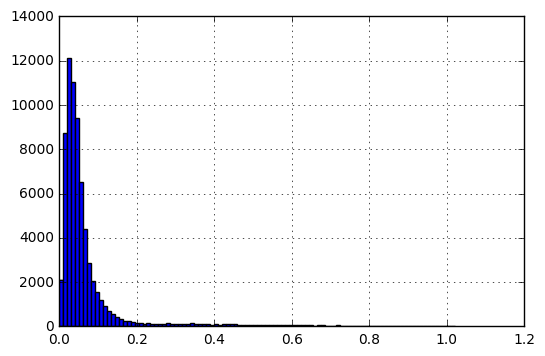

In [128]:
df.last_l_incorrect[df.last_l_incorrect > 0][df.n_incorrect < 2].hist(bins=100)

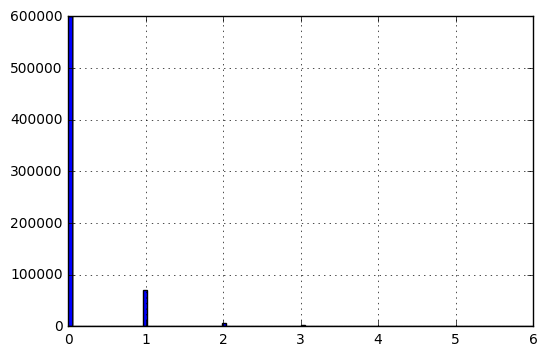

In [92]:
df.n_incorrect[~target].hist(bins=100)

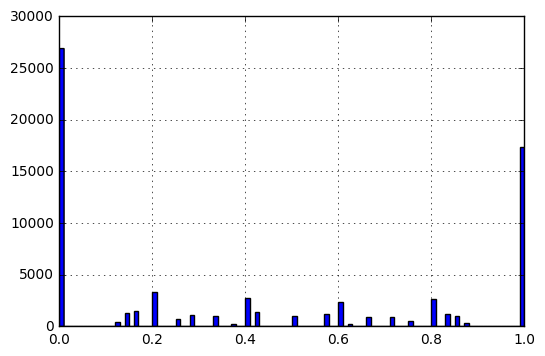

In [77]:
df.first_incorrect_location[(df.n_incorrect == 1)].hist(bins=100)

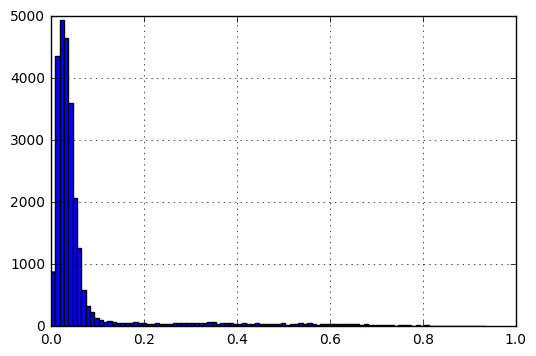

In [50]:
df.first_l_incorrect[
    (df.first_incorrect_location != 0) &
    (df.first_incorrect_location != 1) &
    (df.first_l_incorrect > 0) & 
    (df.n_incorrect == 1)].hist(bins=100)

(0.060252850094052762, 43851)

In [62]:
pur_eff((df.n_rl_switch<3), target2)

{'bkg_rej': 0.7724471161162685,
 'eff': 0.19465783851845564,
 'pur': 0.08426422674603758,
 'rej': 0.7756419152412188}

In [41]:
target.groupby(df.may_alias).sum()

may_alias
0.0     4202.0
1.0    42831.0
Name: rl_purity, dtype: float64

In [42]:
(target*(df.may_alias==0)).sum() / (df.may_alias==0).sum()
(target*(df.may_alias==0)).sum() / target.sum()

/nfs/dust/belle2/user/ofrost/basf2/externals/v01-02-02/Linux_x86_64/common/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


0.089341526162481658

In [62]:
n_correct = df["size"] - df.n_incorrect

In [15]:
almost_alias = (df.may_alias ==1 )| ((n_correct == 1) & ((df.last_incorrect_location < 1) | (df.first_incorrect_location > 0)))

In [16]:
(target*almost_alias).sum() / almost_alias.sum()
(target*almost_alias).sum() / target.sum()

/nfs/dust/belle2/user/ofrost/basf2/externals/v01-02-02/Linux_x86_64/common/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


0.92547944040481356

In [23]:
df["n_correct"] = df["size"] - df.n_incorrect

In [61]:
target.sum() - target[df.may_alias == 0].sum()

4203

In [24]:
may_df = df[df.may_alias==0]

In [26]:
may_df.n_correct.hist()

In [29]:
may_df.n_correct.value_counts()

6.0     242229
7.0     154347
8.0      91576
5.0      54031
9.0      33352
4.0      13832
10.0      5232
0.0       2516
3.0       1794
11.0      1766
12.0      1576
1.0       1288
2.0        499
Name: n_correct, dtype: int64

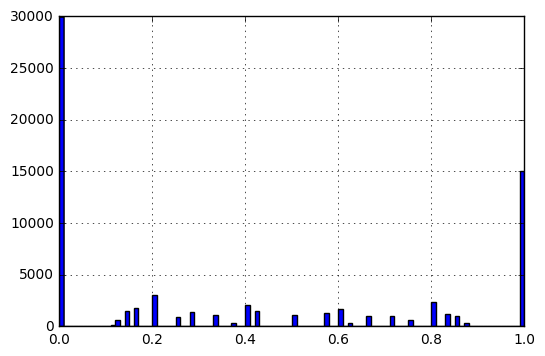

In [40]:
may_df.first_incorrect_location.hist(bins=100)

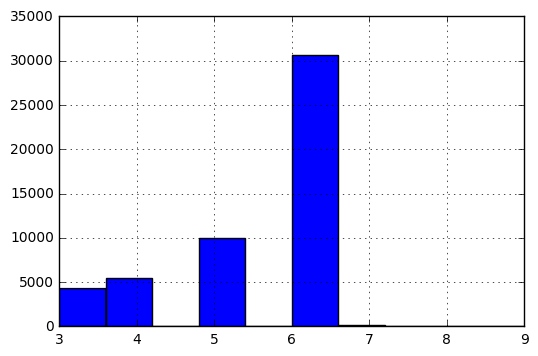

In [50]:
df.n_incorrect[df.n_incorrect > 2].hist()

In [43]:
almost_alias = n_correct == 1

In [23]:
target[df.may_alias]

may_alias
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
       ...  
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
1.0    False
0.0    False
0.0    False
0.0    False
0.0    False
1.0    False
1.0    False
1.0    False
1.0    False
0.0    False
1.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
0.0    False
1.0    False
0.0    False
0.0    False
0.0    False
Name: rl_purity, dtype: bool

In [169]:
df_sl8 = df[df.supercluster_id == 8]

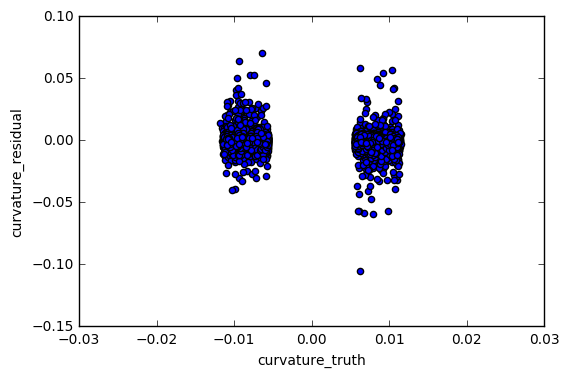

In [170]:
df_sl8.plot.scatter(x="curvature_truth", y="curvature_residual")

In [173]:
import seaborn as sns

ImportError: No module named 'seaborn'

In [ ]:
df_sl8.plot.density(x="curvature_truth", y="curvature_residual")